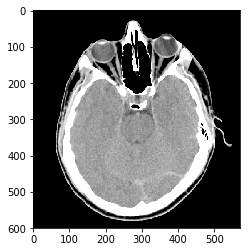

In [53]:
# Gozalez examples 3.19
# sharpen image oriented fuzzy

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from skimage import data,img_as_float
from skimage import img_as_ubyte
import math

# Read Images
img = mpimg.imread('Fig0359(a)(headCT_Vandy).tif')
plt.imshow(img,'gray')

In [54]:
def u_ze(d):
    if d < -0.25:
        ze = 0;
    elif d > 0.25:
        ze = 0
    elif (d > 0) & (d < 0.25):
        ze = -4*d + 1
    else:
        ze = 4*d + 1
    return ze

def u_white(z):
    if z < 0.25:
        v = 0
    else:
        v = 4*z/3.0 - 1.0/3
    return v


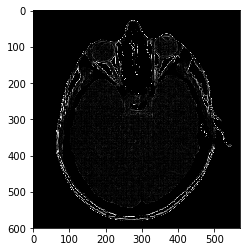

In [100]:
img = img_as_float(img)
length = img.shape[0]
weith = img.shape[1]
img1 = np.zeros((length,weith))
for i in range(1,length-1):
    for j in range(1,weith-1):
        d2 = img[i-1,j]
        d4 = img[i,j-1]
        d6 = img[i,j+1]
        d8 = img[i+1,j]
        z = img[i,j]
        lamda1 = min(u_ze(z-d2),u_ze(z-d6))
        lamda2 = min(u_ze(z-d6),u_ze(z-d8))
        lamda3 = min(u_ze(z-d4),u_ze(z-d8))
        lamda4 = min(u_ze(z-d2),u_ze(z-d4))
        lamdaE = min(np.ones(4)-[lamda1,lamda2,lamda3,lamda4])
        img1[i,j] = (lamdaE * (1-u_white(z)))/(max([lamda1,lamda2,lamda3,lamda4]) + lamdaE)
plt.imshow(img1,'gray')